In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

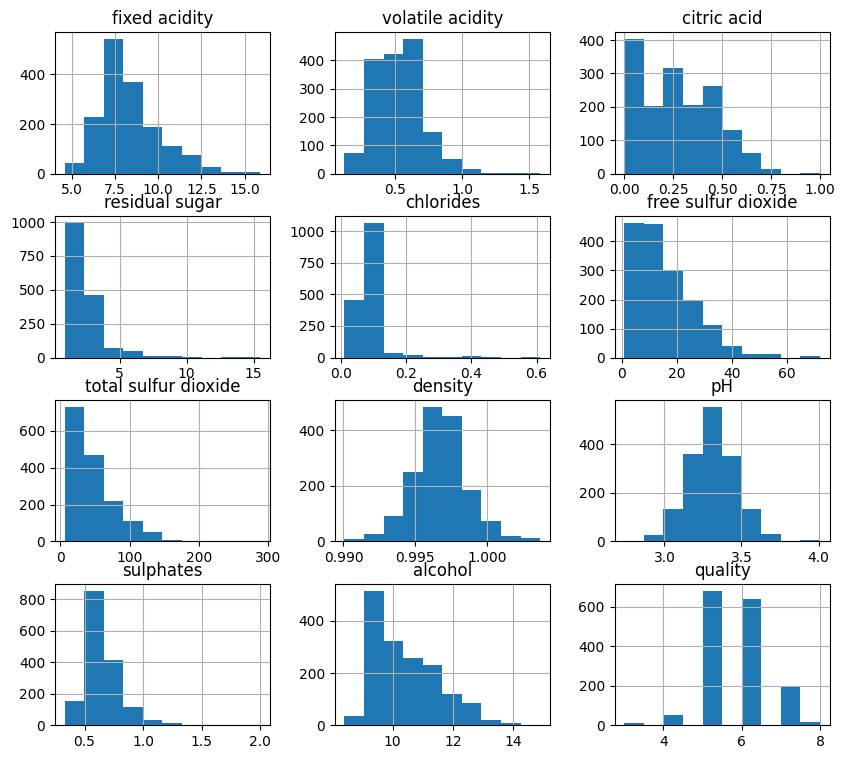

In [5]:
wine.hist(figsize=(10,9))

<Axes: >

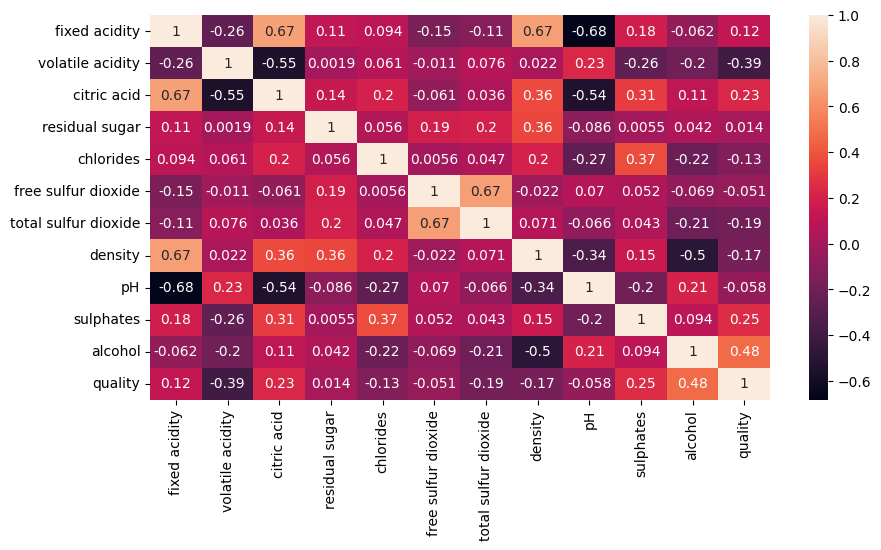

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data = wine.corr(), annot=True)

In [7]:
X = wine.drop(columns=['quality'])
y = wine['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

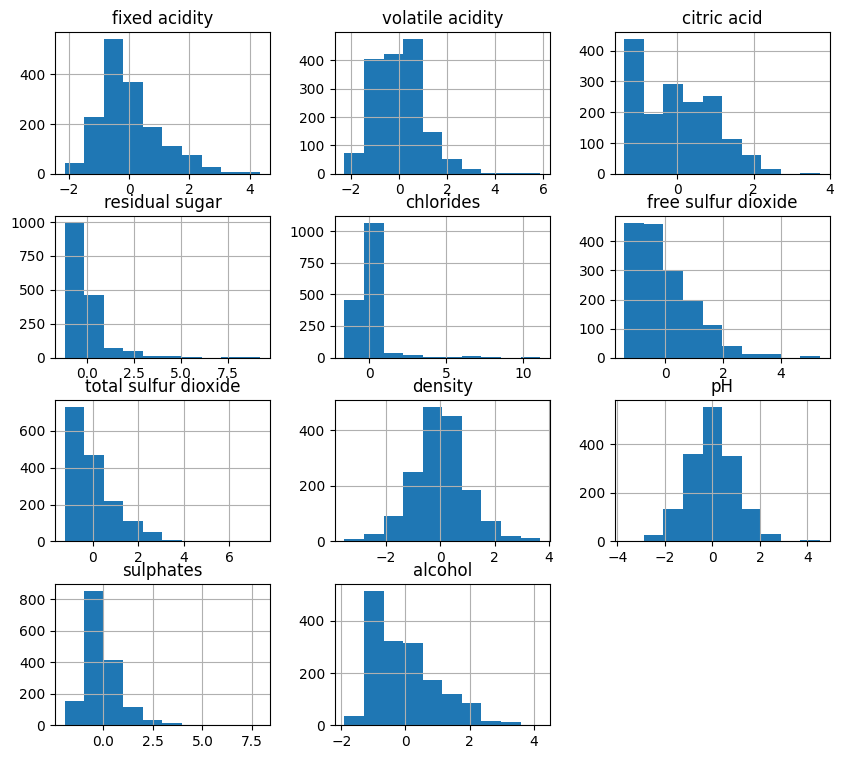

In [8]:
X_columns = X.columns
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns= X_columns)

X_scaled.hist(figsize=(10,9))

In [57]:
#Feature selection using pearson algorithm

fs = SelectKBest(score_func=f_regression, k=10)
X_selected = (fs.fit_transform(X_scaled, y))
mask = fs.get_support()
selected_columns = X.columns[mask]
X_selected = pd.DataFrame(data=X_selected, columns= selected_columns)
X_selected

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

model_IS = pd.Series((model.coef_), index=X_selected.columns)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 0.5041
Root Mean Squared Error: 0.6252
R-squared: 0.4019


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model2 = Ridge()
param = {'alpha' : np.logspace(-3, 3, 3)}
model_cv = GridSearchCV(model2, param, cv=5, scoring='neg_mean_squared_error')
model_cv.fit(X_train, y_train)

best_alpha = model_cv.best_params_['alpha']

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

ridge_best_coef = ridge_best.coef_
feature_imp = (ridge_best_coef)

importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': feature_imp
}).sort_values(by='Importance', ascending=False)

y_pred2 = ridge_best.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)
print(f"Mean Absolute Error: {mae2:.4f}")
print(f"Root Mean Squared Error: {rmse2:.4f}")
print(f"R-squared: {r2_2:.4f}")

Mean Absolute Error: 0.5036
Root Mean Squared Error: 0.6245
R-squared: 0.4032


In [98]:
comparison_df = pd.DataFrame({
    'Model': ['OLS Regression', 'Ridge Regression'],
    'R² Score': [r2, r2_2],
    'RMSE': [rmse, rmse2],
    'MAE': [mae, mae2]
})

print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
              Model  R² Score      RMSE       MAE
0    OLS Regression  0.401906  0.625186  0.504088
1  Ridge Regression  0.403163  0.624529  0.503559


* R² Score: Ridge Regression has a slightly higher R² score than OLS, indicating that it explains a marginally higher proportion of the variance in wine quality.

* RMSE: Ridge Regression has a lower RMSE, suggesting that its predictions are closer to the actual values.

* MAE: Similarly, Ridge Regression exhibits a lower MAE, reinforcing that its predictions are more accurate on average.

In [139]:
df = (model_IS.sort_values(ascending=False)).reset_index()
df.columns = ['Feature', 'Importance']
df = df.reindex(np.abs(df['Importance']).sort_values(ascending=False).index)
print(df)

                Feature  Importance
0               alcohol    0.306495
9      volatile acidity   -0.179340
1             sulphates    0.140843
8  total sulfur dioxide   -0.119935
7             chlorides   -0.085020
6                    pH   -0.065048
2   free sulfur dioxide    0.060364
3         fixed acidity    0.031481
5           citric acid   -0.026515
4               density   -0.008646


In [140]:
importance= importance.reindex(np.abs(importance['Importance']).sort_values(ascending=False).index)
print(importance)

                 Feature  Importance
10               alcohol    0.299728
1       volatile acidity   -0.179041
9              sulphates    0.142528
6   total sulfur dioxide   -0.119695
4              chlorides   -0.084956
8                     pH   -0.060325
5    free sulfur dioxide    0.058663
0          fixed acidity    0.040639
2            citric acid   -0.027127
7                density   -0.020163
3         residual sugar    0.009437


In [147]:
fig = px.bar(df, x='Feature', y='Importance', title='Linear Regression model\'s feature importance chart', labels={'Featurea': 'Features', 'Importance': 'Importances'})
fig.show()
fig = px.bar(importance, x='Feature', y='Importance', title='Ridge Regression model\'s feature importance chart', labels={'Feature': 'Features', 'Importance': 'Importances'})
fig.show()